# How to implement these 5 powerful probability distributions in Python

### Source
https://bigdata-madesimple.com/how-to-implement-these-5-powerful-probability-distributions-in-python/

* **Discrete probability: probability mass functions**
    * ex:
        * Bernoulli distribution
        * Binomial distribution
        * Poisson distribution
        * Geometric distribution
* **Continuous probability: probability density functions**
    * ex:
        * normal distribution
        * exponential distribution
        * beta distribution

In [0]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

### Binomial distribution

* `n` 次試驗 trials
* `k` 次成功 successes
* `p` 每次成功的機率 probability
* `E(X) = np` 期望值 或是 mean
* `Var(X) = np(1-p)`

In [2]:
n = 10
p = 0.3
k = np.arange(0, 21)
binomial = stats.binom.pmf(k, n, p)
print(binomial)

[2.82475249e-02 1.21060821e-01 2.33474440e-01 2.66827932e-01
 2.00120949e-01 1.02919345e-01 3.67569090e-02 9.00169200e-03
 1.44670050e-03 1.37781000e-04 5.90490000e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


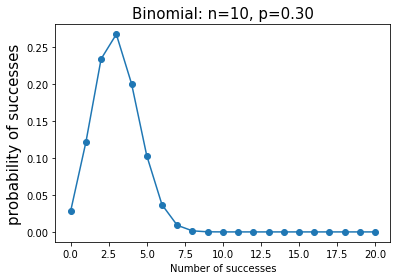

In [3]:
plt.plot(k, binomial, 'o-')
plt.title('Binomial: n=%i, p=%.2f' % (n, p), fontsize=15)
plt.xlabel('Number of successes')
plt.ylabel('probability of successes', fontsize=15)
plt.show()

In [4]:
binom_sim = stats.binom.rvs(n=10, p=0.3, size=10000) # 產生 10000 個隨機變數
print('Mean: %g' % np.mean(binom_sim))
print('Std: %g' % np.std(binom_sim, ddof=1))

Mean: 2.9825
Std: 1.43951


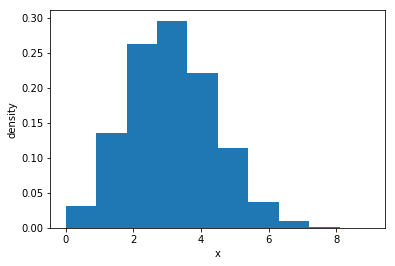

In [5]:
plt.hist(binom_sim, bins=10, density=True)
plt.xlabel('x')
plt.ylabel('density')
plt.show()

### Poisson distribution

* 在**固定時間間隔**內，事件發生的比率是 $\lambda$ (事件發生幾次)
* `E(X)` = $\lambda$
* `Var(X)` = $\lambda$

In [6]:
rate = 2
n = np.arange(0, 10)
y = stats.poisson.pmf(n, rate)
print(y)

[1.35335283e-01 2.70670566e-01 2.70670566e-01 1.80447044e-01
 9.02235222e-02 3.60894089e-02 1.20298030e-02 3.43708656e-03
 8.59271640e-04 1.90949253e-04]


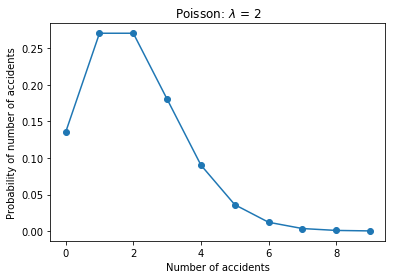

In [7]:
plt.plot(n, y, 'o-')
plt.title('Poisson: $\lambda$ = %i' % rate)
plt.xlabel('Number of accidents')
plt.ylabel('Probability of number of accidents')
plt.show()

In [8]:
data = stats.poisson.rvs(mu=2, loc=0, size=1000)
print('Mean: %g' % np.mean(data))
print('Std: %g' % np.std(data, ddof=1))

Mean: 1.966
Std: 1.4138


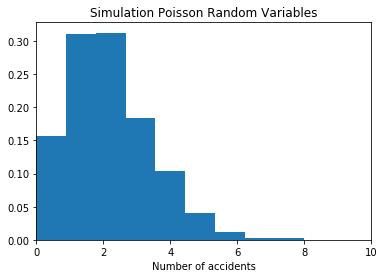

In [9]:
plt.figure()
plt.hist(data, bins=9, density=True)
plt.xlim(0, 10)
plt.xlabel('Number of accidents')
plt.title('Simulation Poisson Random Variables')
plt.show()

### Normal distribution

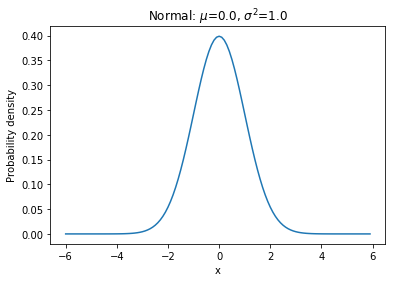

In [10]:
mu = 0
var = 1
n = np.arange(-6, 6, 0.1)
y = stats.norm.pdf(n, 0, 1)
plt.figure()
plt.plot(n, y, '-')
plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('Normal: $\mu$=%.1f, $\sigma^2$=%.1f' % (0, 1))
plt.show()

### Beta distribution

* 介於 0 ~ 1 之間
* 由參數 $\alpha$ 和 $\beta$ 決定
* 主要是在 Bayesian analysis 中使用

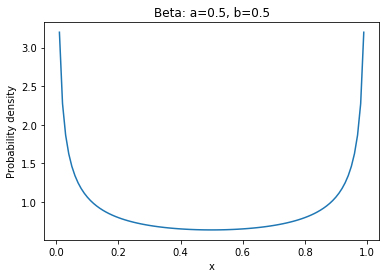

In [11]:
a = 0.5
b = 0.5
x = np.arange(0.01, 1, 0.01)
y = stats.beta.pdf(x, a, b)

plt.plot(x, y)
plt.title('Beta: a=%.1f, b=%.1f' % (a, b))
plt.xlabel('x')
plt.ylabel('Probability density')
plt.show()

### Exponential distribution

* 事件是**連續且獨立**的事件，以固定的比率發生
* `E(X)` = 1/$\lambda$
* `Var(X)` = 1 / $\lambda^2$

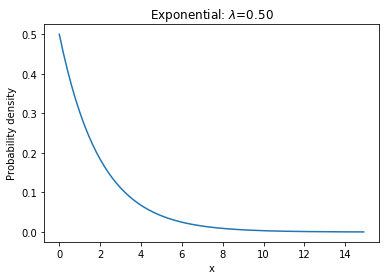

In [12]:
lambd = 0.5
x = np.arange(0, 15, 0.1)
y1 = lambd * np.exp(-lambd * x)
# y2 = stats.expon.pdf(lambd)

plt.plot(x, y1)
# plt.plot(x, y2)
plt.title('Exponential: $\lambda$=%.2f' % lambd)
plt.xlabel('x')
plt.ylabel('Probability density')
plt.show()

In [14]:
data = stats.expon.rvs(scale=2, size=1000)
print('Mean: %g' % np.mean(data))
print('Std: %g' % np.std(data, ddof=1))

Mean: 1.91898
Std: 1.85289


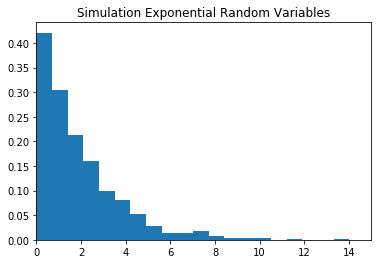

In [15]:
plt.figure()
plt.hist(data, bins=20, density=True)
plt.xlim(0, 15)
plt.title('Simulation Exponential Random Variables')
plt.show()
